# Vectorisation TF-IDF avec CountVectorizer et classification avec SGDClassifier

In [57]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,"Allons vers l'hopital de Contrexéville, c'est ...",0,0,1,0
1,J'ai compris que ma montre devait être cassée.,0,0,1,0
2,Montre-moi le trajet pour aller Ã l'hopital d...,1,0,0,0
3,Il paracadute di Tom non si è aperto.,0,1,1,0
4,"~uw&| XOH.w!,Lnh&G",0,0,0,1
...,...,...,...,...,...
1415263,Je veux arriver Ã la ville de Aiton.,0,0,1,0
1415264,\NSzD:FtBlL6@8_k3p,0,0,0,1
1415265,"q12<|""aED%]=3vO1Z7",0,0,0,1
1415266,Mon trajet se termine Ã la gare de bourges-ga...,0,0,1,0


In [58]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


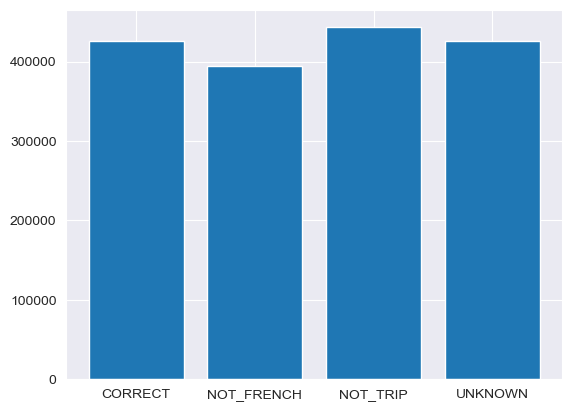

In [59]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [60]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(566107,) (70763,) (70764,)
(566107, 4) (70763, 4) (70764, 4)


In [61]:
X_train.values

array(['yzuonqcrb lgxs rmn',
       'Planifie un dÃ©placement vers la maison de Edona, Ã\xa0 la ville de Montbrison, en partant de Nice.',
       ' rjg yxit ogxilqpg', ...,
       'En partant de la ville de Chalindrey, je voudrais savoir comment me rendre chez Conchita Ã\xa0 Valençay ?',
       "Fadil's mother was single.", 'c jlw  ffo uxvesiz'], dtype=object)

# Exemple d'utilisation de TfidfVectorizer

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<566107x335552 sparse matrix of type '<class 'numpy.float64'>'
	with 4534097 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [63]:
v.get_feature_names_out()[100000:100050]

array(['fnegin', 'fnejsvxos', 'fnek', 'fnemxojgy', 'fnen', 'fneqhww',
       'fnerxep', 'fney', 'fnf', 'fnfgegqernikkty', 'fnfgug', 'fnfmayr',
       'fnfrubuct', 'fnfsmwkgaayyt', 'fnfuebfj', 'fnfun', 'fnfusk',
       'fnfv', 'fnfvnekclpna', 'fnfvr', 'fnfx', 'fng', 'fng1nhdh', 'fng_',
       'fngfofc4', 'fngi', 'fngna', 'fngq', 'fngrt', 'fngsl', 'fnh',
       'fnhn', 'fnhnrcso', 'fnho', 'fnhrmf', 'fnhuvh', 'fnhvji', 'fnhvl',
       'fnhy0', 'fnhyoj', 'fnhyt', 'fni', 'fni9', 'fni_cun8', 'fnic',
       'fniebpm', 'fnihytham', 'fnik', 'fnimbfhigesri', 'fnis'],
      dtype=object)

In [64]:
# Number of identified features
v.get_feature_names_out().shape

(335552,)

In [65]:
v = TfidfVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494122x83938 sparse matrix of type '<class 'numpy.float64'>'
	with 5083555 stored elements in Compressed Sparse Row format>

In [66]:
# Number of identified features
v.get_feature_names_out().shape

(83938,)

In [67]:
v.get_feature_names_out()[30000:30050]

array(['funzionari', 'funzionato', 'funzionava', 'funzione', 'funzionerà',
       'funzioni', 'funzionò', 'funérailles', 'funéraire', 'fuoco',
       'fuor', 'fuorché', 'fuori', 'fuorviata', 'fur', 'furche', 'furcht',
       'furchtbar', 'furchtbare', 'furchtbarer', 'furcy', 'furent',
       'furet', 'fureur', 'furgone', 'furia', 'furieux', 'furigana',
       'furiosa', 'furiosi', 'furioso', 'furious', 'furnace', 'furnish',
       'furnished', 'furniture', 'furono', 'furry', 'further', 'furtifs',
       'furto', 'furzerei', 'fus', 'fusa', 'fuse', 'fusible', 'fusillade',
       'fusillé', 'fusion', 'fusione'], dtype=object)

In [68]:
# Add threshold to observe only words that appear at least 100 times
v = TfidfVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494122x1924 sparse matrix of type '<class 'numpy.float64'>'
	with 4773882 stored elements in Compressed Sparse Row format>

In [69]:
# Number of identified features
v.get_feature_names_out().shape

(1924,)

In [70]:
v.get_feature_names_out()[::50]

array(['11', 'allez', 'arques', 'ax', 'best', 'brignais', 'casa',
       'chauffailles', 'conflent', 'dei', 'does', 'elle', 'faire',
       'friend', 'grandmont', 'her', 'io', 'laissac', 'likes',
       'luxembourg', 'marsan', 'mir', 'morteau', 'neuchâtel', 'offenburg',
       'partant', 'planning', 'puedo', 'rencontrer', 'rumilly', 'seem',
       'something', 'sus', 'thouars', 'trier', 'valois', 'vire',
       'whether', 'ziri'], dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer TfidfVectorizer + classifier LogisticRegression avec OneVsRestClassifier pour la classification multi-label)

In [71]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', OneVsRestClassifier(SGDClassifier(
        alpha=0.0001,
        penalty='l2',
        loss='modified_huber',
        max_iter=1000
    )))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 OneVsRestClassifier(estimator=SGDClassifier(loss='modified_huber')))])

# Evaluation du modèle, métriques

In [72]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.98      0.99      0.99     21225
  NOT_FRENCH       0.98      0.96      0.97     19655
    NOT_TRIP       0.98      0.89      0.93     22075
     UNKNOWN       0.96      0.98      0.97     21522

   micro avg       0.98      0.96      0.97     84477
   macro avg       0.98      0.96      0.97     84477
weighted avg       0.98      0.96      0.97     84477
 samples avg       0.96      0.96      0.96     84477



C:\Users\nathp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

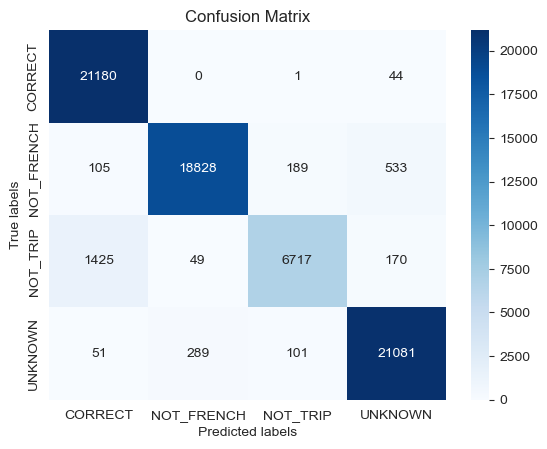

In [74]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

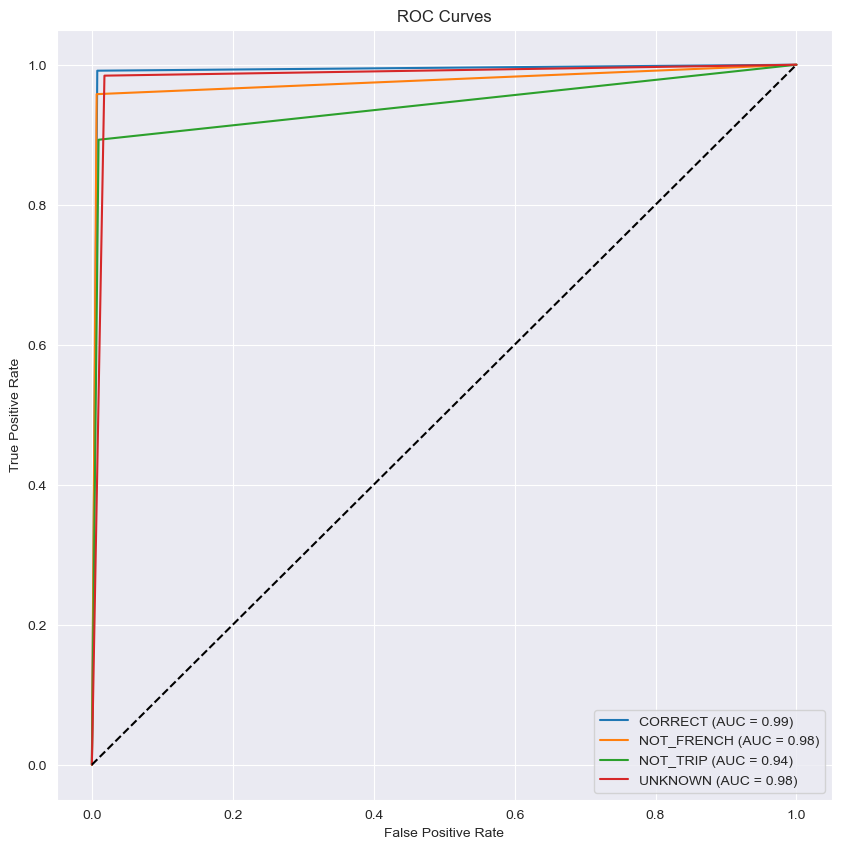

In [75]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [76]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 7.6%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 53.7%
 - UNKNOWN => 26.6%

* Je veux aller du cinéma au restaurant
 - CORRECT => 10.7%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 69.7%
 - UNKNOWN => 6.7%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 19.3%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 100.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 76.2%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 30.3%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 10.9%
 - NOT_FRENCH => 7.5%
 - NOT_TRIP => 18.2%
 - UNKNOWN => 71.9%

* Dirige moi vers Lyon depuis Saint-Ét

### Pour un même classifier, la vectorisation TF-IDF semble moins performante que la N-grams ou la BoW (voir matrice de confusion).